In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#A primeira linha mostra a casa onde está a cabeça da cobra e a base da escada. 
#A segunda linha mostra o rabo da cobra e o topo da escada.

snakes = np.array([[16,48,49,56,62,64,87,93,95,98],
                   [6,26,11,53,19,60,24,73,75,78]])
ladders = np.array([[1,4,9,21,28,36,51,71,80],
                    [38,14,31,42,84,44,67,91,100]])

In [3]:
#Matriz de transição. Cada linha tem todas as formas de sair de uma determinada casa.
#A linha zero corresponde à casa 0, a posição fora do tabuleiro no começo do jogo.

A = np.diag(np.ones(100)/6,1)
for ii in range(2,7):
    A = A + np.diag(np.ones(101-ii)/6,ii)

#É necessário ajustar as probablidades de chegar na casa 100. Por exemplo, da casa 99 qualquer lançamento leva à casa 100
    
for ii in range(101):
    A[ii,100] += 1 - np.sum(A[ii,:])

In [4]:
#Ajusta a matriz de transição para os snakes e ladders. Por exemplo, a probabilidade de eu cair no rabo da cobra é
#igual à probabilidade de eu cair diretamente nessa casa mais a probabilidade de eu cair na cabeça da cobra.

for ii in range(ladders.shape[1]):
    A[:,ladders[1,ii]] = A[:,ladders[1,ii]] + A[:,ladders[0,ii]]
    A[:,ladders[0,ii]] = 0
for ii in range(snakes.shape[1]):
    A[:,snakes[1,ii]] = A[:,snakes[1,ii]] + A[:,snakes[0,ii]]
    A[:,snakes[0,ii]] = 0

In [5]:
#Matriz das probabilidades, Na rodada zero, antes de começar o jogo, eu estou com certeza na casa zero

N_rodadas = 100
p = np.zeros((101,N_rodadas+1))
p[0,0] = 1

In [6]:
for ii in range(N_rodadas):
    p[:,ii+1] = np.dot(p[:,ii],A)

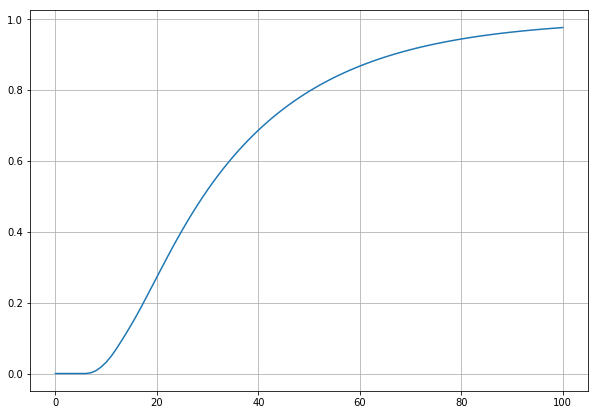

In [7]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot((p[100,:]))
plt.grid()

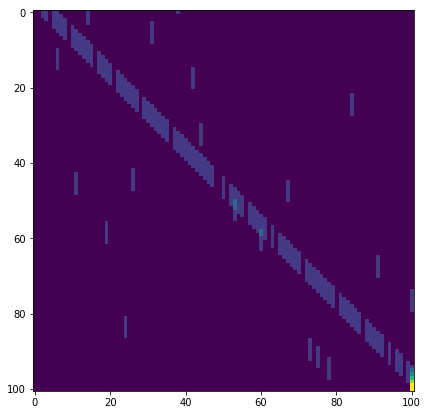

In [8]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.imshow(A)

In [22]:
print(A[95:101,95:101])

[[ 0.          0.16666667  0.16666667  0.16666667  0.16666667  0.33333333]
 [ 0.          0.          0.16666667  0.16666667  0.16666667  0.5       ]
 [ 0.          0.          0.          0.16666667  0.16666667  0.66666667]
 [ 0.          0.          0.          0.          0.16666667  0.83333333]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]
